In [1]:
pwd

'/Users/bashirmohammed/Dropbox/CodeRoom/Python/correlation_analysis/notebooks'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
#plt.rcParams["axes.labelweight"]

In [3]:
df = pd.read_csv("2018_1hourdata_labelled.csv")

In [4]:
df.shape

(8760, 98)

In [5]:
df.head()

,Time,SACR_SUNN_in,SACR_SUNN_out,LOND_NEWY_in,LOND_NEWY_out,JGI_SACR_in,JGI_SACR_out,HOUS_PANTEX_in,HOUS_PANTEX_out,BOIS_PNWG_in,...,AMST_LOND_out,FNAL_STAR_in,FNAL_STAR_out,BOST_STAR_in,BOST_STAR_out,BOST_NEWY_in,BOST_NEWY_out,ATLA_WASH_in,ATLA_WASH_out,label
0,1/1/18 8:00,1.411093e+10,1.025131e+10,1.109243e+09,8.683116e+09,8.289831e+07,471952486.5,56650005.21,28102344.40,1.117868e+07,...,1.290804e+10,6.221437e+07,4.177833e+07,6.127005e+09,1.505475e+10,1.116761e+10,2.391813e+09,3.005335e+09,5.993152e+09,1
1,1/1/18 9:00,1.345362e+10,9.191558e+09,1.242256e+09,5.181239e+09,4.375739e+04,470169221.0,49307351.26,20240358.57,7.070847e+06,...,7.468747e+09,1.943452e+08,3.058273e+08,4.952796e+09,1.096238e+10,7.879534e+09,2.225971e+09,3.043124e+09,4.402875e+09,1
2,1/1/18 10:00,1.216888e+10,7.793842e+09,2.006322e+09,1.224286e+10,4.315725e+04,254319077.6,56843652.59,13076249.56,5.132826e+07,...,1.451626e+10,2.368597e+08,2.297360e+08,7.193835e+09,1.840171e+10,1.573402e+10,2.598615e+09,3.254450e+09,3.451973e+09,1
3,1/1/18 11:00,1.123120e+10,7.097238e+09,1.073181e+09,4.717642e+09,8.277154e+07,167067135.5,46645240.59,15344128.69,5.217827e+06,...,7.139046e+09,2.644591e+07,8.776042e+07,4.389148e+09,7.153226e+09,7.690503e+09,1.992397e+09,3.717638e+09,5.663406e+09,1
4,1/1/18 12:00,1.078085e+10,8.048294e+09,8.645069e+08,1.987249e+09,3.343548e+04,113702282.5,30966947.37,23023533.87,7.495363e+06,...,4.691328e+09,3.782775e+07,7.183373e+07,2.982568e+09,4.568829e+09,4.828736e+09,2.083069e+09,3.753083e+09,4.915730e+09,1


In [6]:
del df['Time']

In [7]:
c = df.iloc[:,-1].values

In [8]:
c.shape

(8760,)

In [10]:
df.shape

(8760, 97)

In [11]:
del df['label']

In [12]:
df.shape

(8760, 96)

In [14]:
df.columns

Index(['SACR_SUNN_in', 'SACR_SUNN_out', 'LOND_NEWY_in', 'LOND_NEWY_out',
       'JGI_SACR_in', 'JGI_SACR_out', 'HOUS_PANTEX_in', 'HOUS_PANTEX_out',
       'BOIS_PNWG_in', 'BOIS_PNWG_out', 'DENV_NREL_in', 'DENV_NREL_out',
       'CHIC_WASH_in', 'CHIC_WASH_out', 'LLNL_SUNN_in', 'LLNL_SUNN_out',
       'LSVN_SUNN_in', 'LSVN_SUNN_out', 'CHIC_KANS_in', 'CHIC_KANS_out',
       'CHIC_STAR_in', 'CHIC_STAR_out', 'DENV_LSVN_in', 'DENV_LSVN_out',
       'PPPL_WASH_in', 'PPPL_WASH_out', 'HOUS_NASH_in', 'HOUS_NASH_out',
       'ALBQ_SNLA_in', 'ALBQ_SNLA_out', 'EASH_WASH_in', 'EASH_WASH_out',
       'SLAC_SUNN_in', 'SLAC_SUNN_out', 'ELPA_SUNN_in', 'ELPA_SUNN_out',
       'ATLA_NASH_in', 'ATLA_NASH_out', 'CHIC_ECHI_in', 'CHIC_ECHI_out',
       'NERSC_SUNN_in', 'NERSC_SUNN_out', 'AMST_BOST_in', 'AMST_BOST_out',
       'BNL_NEWY_in', 'BNL_NEWY_out', 'DENV_PNWG_in', 'DENV_PNWG_out',
       'ATLA_ORNL_in', 'ATLA_ORNL_out', 'AOFA_LOND_in', 'AOFA_LOND_out',
       'ELPA_HOUS_in', 'ELPA_HOUS_out', 'ANL_STAR

In [15]:
df.shape

(8760, 96)

In [16]:
df = StandardScaler().fit_transform(df)
df=pd.DataFrame(df)


In [20]:
#df.head()

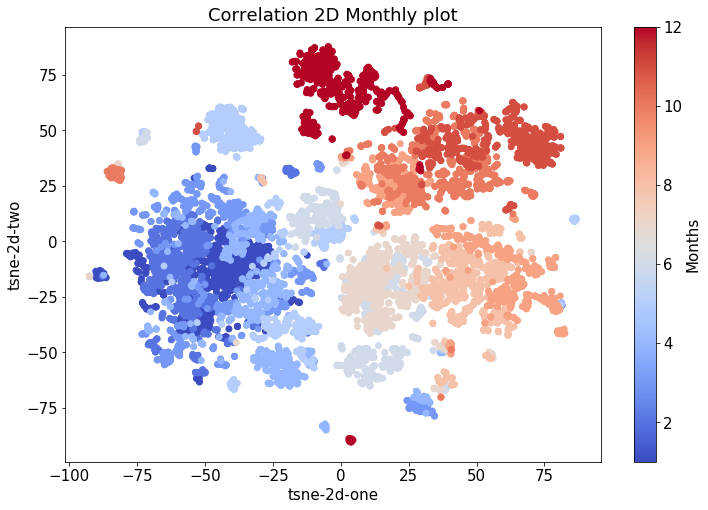

In [18]:
plt.rcParams.update({'font.size':15})
tsne = TSNE(random_state=0)
tsne_results = tsne.fit_transform(df)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize = (12,8))
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=c,cmap='coolwarm' )
#plt.legend()
plt.xlabel('tsne-2d-one')
plt.ylabel('tsne-2d-two')
plt.title('Correlation 2D Monthly plot')
plt.colorbar(label='Months')
plt.show()


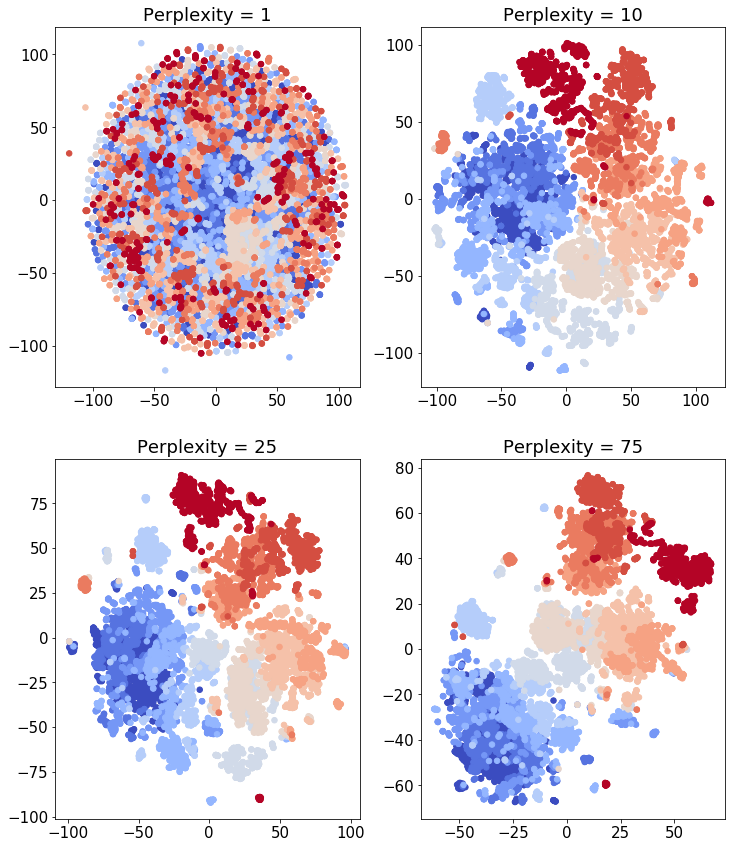

In [19]:
plt.figure(figsize = (12,8))
plt.subplots_adjust(top = 1.5)

for index, p in enumerate([1, 10, 25, 75]):

    tsne = TSNE(n_components = 2, perplexity = p, random_state=0)
    tsne_results = tsne.fit_transform(df)
    
    tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
    
    plt.subplot(2,2,index+1)
    plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=c, s=30, cmap='coolwarm')
    plt.title('Perplexity = '+ str(p))
plt.show()